In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [15]:
df = pd.read_csv('your_file.csv')


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your data into a DataFrame
df = pd.read_csv('your_file.csv')

# 1. Veri Setine Genel Bakış
# Veri türlerini kontrol etme
df.info()

# Eksik verileri kontrol etme
print("Eksik veriler:")
print(df.isnull().sum())

# 2. Eksik Verileri Ele Alma
# TotalCharges sütununda boş değerler varsa, bu satırları çıkar
df = df[df['TotalCharges'] != " "]

# 3. Veri Türlerinin Düzeltilmesi
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# 4. Kategorik Verilerin Kodlanması
# Binary kategoriler için Label Encoding
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# One-Hot Encoding (Çok kategorili değişkenler için)
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'])

# 5. Ölçekleme ve Normalizasyon
# Ölçeklenecek sütunları seçin
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Temizlenmiş veri setinin ilk birkaç satırını görüntüleyin
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    'Column1': [1, 2, 3],
    'Column2': ['A', 'B', 'C']
})

# Check DataFrame info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Column1  3 non-null      int64 
 1   Column2  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,0,-1.280248,0,1,-1.161694,-0.994194,...,False,True,False,False,True,False,False,True,False,False
1,5575-GNVDE,0,0,0,0,0.064303,1,0,-0.260878,-0.173740,...,True,True,False,False,True,False,False,True,False,False
2,3668-QPYBK,0,0,0,0,-1.239504,1,1,-0.363923,-0.959649,...,False,True,False,False,True,False,False,True,False,False
3,7795-CFOCW,0,0,0,0,0.512486,0,0,-0.747850,-0.195248,...,True,False,False,True,True,False,False,True,False,False
4,9237-HQITU,1,0,0,0,-1.239504,1,1,0.196178,-0.940457,...,False,True,False,False,True,False,False,True,False,False


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükle
data = pd.read_csv('/content/your_file.csv')

# Genel veri analizi
print(data.head())
print(data.describe())

# Sütun adlarını kontrol et
print("Sütun adları:", data.columns)

# 1. Cinsiyete Göre Müşteri Sayıları
plt.figure(figsize=(4, 3))  # Grafik boyutunu çok daha küçük yapıyoruz
sns.countplot(x='gender', data=data)
plt.title('Cinsiyete Göre Müşteri Sayıları')
plt.xlabel('Cinsiyet (0: Erkek, 1: Kadın)')
plt.ylabel('Müşteri Sayısı')
plt.xticks([0, 1], ['Erkek', 'Kadın'])
plt.tight_layout()  # Otomatik düzenleme
plt.savefig('/content/gender_count.png', dpi=100)  # Grafik dosyası olarak kaydet
plt.close()

# 2. Yaşlı Müşteri ve Müşteri Kaybı İlişkisi
plt.figure(figsize=(4, 3))  # Grafik boyutunu çok daha küçük yapıyoruz
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)
plt.title('Yaşlı Müşteri ve Müşteri Kaybı İlişkisi')
plt.xlabel('Yaşlı Müşteri (0: Hayır, 1: Evet)')
plt.ylabel('Müşteri Sayısı')
plt.legend(title='Müşteri Kaybı', labels=['Kaybolmadı', 'Kayboldu'])
plt.tight_layout()  # Otomatik düzenleme
plt.savefig('/content/senior_citizen_churn.png', dpi=100)  # Grafik dosyası olarak kaydet
plt.close()

# 3. Aylık Ücretlerin Dağılımı
plt.figure(figsize=(4, 3))  # Grafik boyutunu çok daha küçük yapıyoruz
sns.histplot(data['MonthlyCharges'], kde=True)
plt.title('Aylık Ücretlerin Dağılımı')
plt.xlabel('Aylık Ücret')
plt.ylabel('Frekans')
plt.tight_layout()  # Otomatik düzenleme
plt.savefig('/content/monthly_charges_distribution.png', dpi=100)  # Grafik dosyası olarak kaydet
plt.close()

# 4. İnternet Servis Türlerine Göre Müşteri Sayıları
# Burada internet_service_cols içindeki sütun adlarını doğru bir şekilde güncelleyin
internet_service_cols = [col for col in data.columns if 'InternetService' in col]
internet_service_counts = data[internet_service_cols].sum()

plt.figure(figsize=(5, 4))  # Grafik boyutunu küçültüyoruz
sns.barplot(x=internet_service_counts.index, y=internet_service_counts.values)
plt.title('İnternet Servis Türlerine Göre Müşteri Sayıları')
plt.xlabel('İnternet Servis Türü')
plt.ylabel('Müşteri Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()  # Otomatik düzenleme
plt.savefig('/content/internet_service_counts.png', dpi=100)  # Grafik dosyası olarak kaydet
plt.close()


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

<ipython-input-29-70d1228cdde6>:58: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Otomatik düzenleme


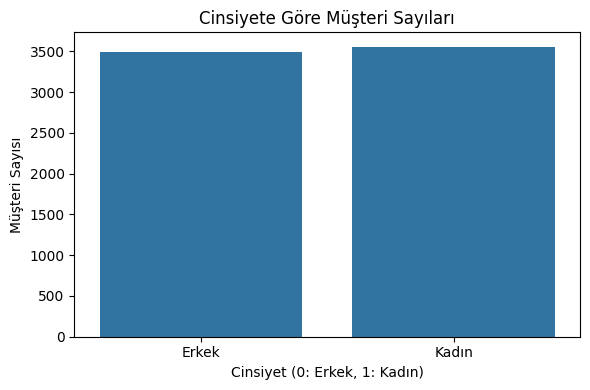

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=data)
plt.title('Cinsiyete Göre Müşteri Sayıları')
plt.xlabel('Cinsiyet (0: Erkek, 1: Kadın)')
plt.ylabel('Müşteri Sayısı')
plt.xticks([0, 1], ['Erkek', 'Kadın'])
plt.tight_layout()
plt.show()


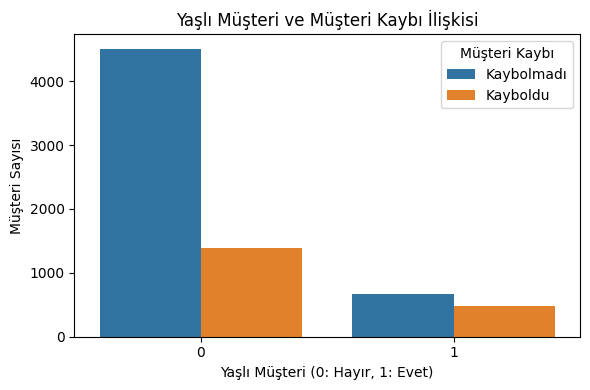

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)
plt.title('Yaşlı Müşteri ve Müşteri Kaybı İlişkisi')
plt.xlabel('Yaşlı Müşteri (0: Hayır, 1: Evet)')
plt.ylabel('Müşteri Sayısı')
plt.legend(title='Müşteri Kaybı', labels=['Kaybolmadı', 'Kayboldu'])
plt.tight_layout()
plt.show()


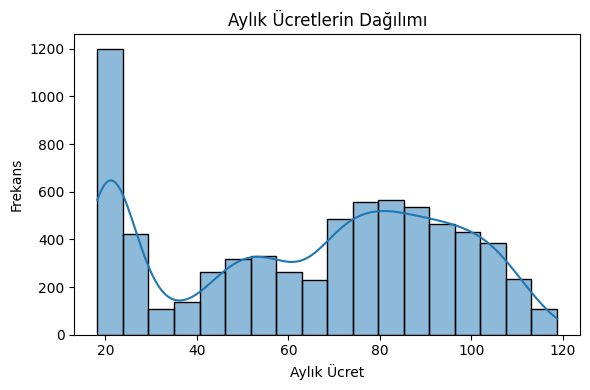

In [33]:
plt.figure(figsize=(6, 4))
sns.histplot(data['MonthlyCharges'], kde=True)
plt.title('Aylık Ücretlerin Dağılımı')
plt.xlabel('Aylık Ücret')
plt.ylabel('Frekans')
plt.tight_layout()
plt.show()


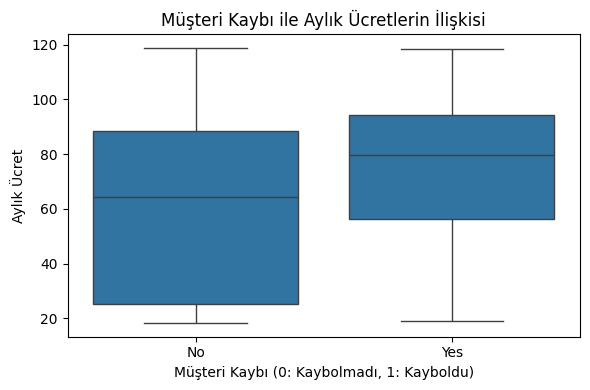

In [35]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Müşteri Kaybı ile Aylık Ücretlerin İlişkisi')
plt.xlabel('Müşteri Kaybı (0: Kaybolmadı, 1: Kayboldu)')
plt.ylabel('Aylık Ücret')
plt.tight_layout()
plt.show()



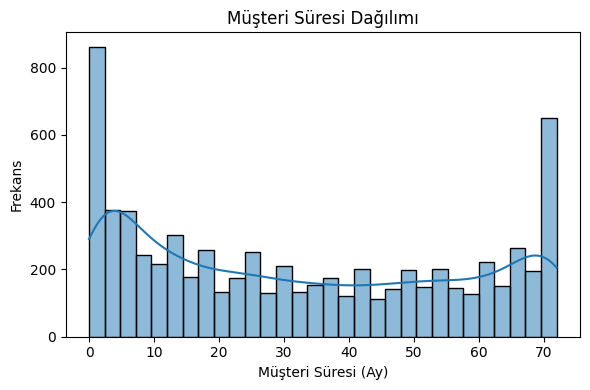

In [36]:
plt.figure(figsize=(6, 4))
sns.histplot(data['tenure'], bins=30, kde=True)
plt.title('Müşteri Süresi Dağılımı')
plt.xlabel('Müşteri Süresi (Ay)')
plt.ylabel('Frekans')
plt.tight_layout()
plt.show()


In [40]:
!pip install dash
!pip install pandas
!pip install plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 25.1 MB/s eta 0:00:00


In [47]:
import pandas as pd
import plotly.express as px

# Veriyi yükle
url = '/content/your_file.csv'
data = pd.read_csv(url)

# Cinsiyete Göre Müşteri Sayıları
gender_counts = data['gender'].value_counts()
gender_fig = px.bar(x=gender_counts.index, y=gender_counts.values,
                    labels={'x': 'Cinsiyet', 'y': 'Müşteri Sayısı'},
                    title='Cinsiyete Göre Müşteri Sayıları')

# Yaşlı Müşteri ve Müşteri Kaybı İlişkisi
senior_citizen_churn = px.histogram(data, x='SeniorCitizen', color='Churn',
                                    labels={'SeniorCitizen': 'Yaşlı Müşteri', 'count': 'Müşteri Sayısı'},
                                    title='Yaşlı Müşteri ve Müşteri Kaybı İlişkisi')

# Aylık Ücretlerin Dağılımı
monthly_charges_fig = px.histogram(data, x='MonthlyCharges', nbins=30,
                                   labels={'MonthlyCharges': 'Aylık Ücret'},
                                   title='Aylık Ücretlerin Dağılımı')

# İnternet Servis Türlerine Göre Müşteri Sayıları
internet_service_counts = data[[col for col in data.columns if 'InternetService' in col]].sum()
internet_service_fig = px.bar(x=internet_service_counts.index, y=internet_service_counts.values,
                              labels={'x': 'İnternet Servis Türü', 'y': 'Müşteri Sayısı'},
                              title='İnternet Servis Türlerine Göre Müşteri Sayıları')

# Grafiklerin gösterimi
gender_fig.show()
senior_citizen_churn.show()
monthly_charges_fig.show()
internet_service_fig.show()


In [44]:
!pip install pandas plotly matplotlib


In [45]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Veriyi yükle
url = '/content/your_file.csv'
data = pd.read_csv(url)

# Cinsiyete Göre Müşteri Sayıları
gender_counts = data['gender'].value_counts()
gender_fig = px.bar(x=gender_counts.index, y=gender_counts.values, labels={'x': 'Cinsiyet', 'y': 'Müşteri Sayısı'},
                    title='Cinsiyete Göre Müşteri Sayıları')
gender_fig.show()

# Yaşlı Müşteri ve Müşteri Kaybı İlişkisi
senior_citizen_churn = px.histogram(data, x='SeniorCitizen', color='Churn',
                                    labels={'SeniorCitizen': 'Yaşlı Müşteri', 'count': 'Müşteri Sayısı'},
                                    title='Yaşlı Müşteri ve Müşteri Kaybı İlişkisi')
senior_citizen_churn.show()

# Aylık Ücretlerin Dağılımı
monthly_charges_fig = px.histogram(data, x='MonthlyCharges', nbins=30,
                                   labels={'MonthlyCharges': 'Aylık Ücret'},
                                   title='Aylık Ücretlerin Dağılımı')
monthly_charges_fig.show()

# İnternet Servis Türlerine Göre Müşteri Sayıları
internet_service_counts = data[[col for col in data.columns if 'InternetService' in col]].sum()
internet_service_fig = px.bar(x=internet_service_counts.index, y=internet_service_counts.values,
                              labels={'x': 'İnternet Servis Türü', 'y': 'Müşteri Sayısı'},
                              title='İnternet Servis Türlerine Göre Müşteri Sayıları')
internet_service_fig.show()
